# Walmart Business Case

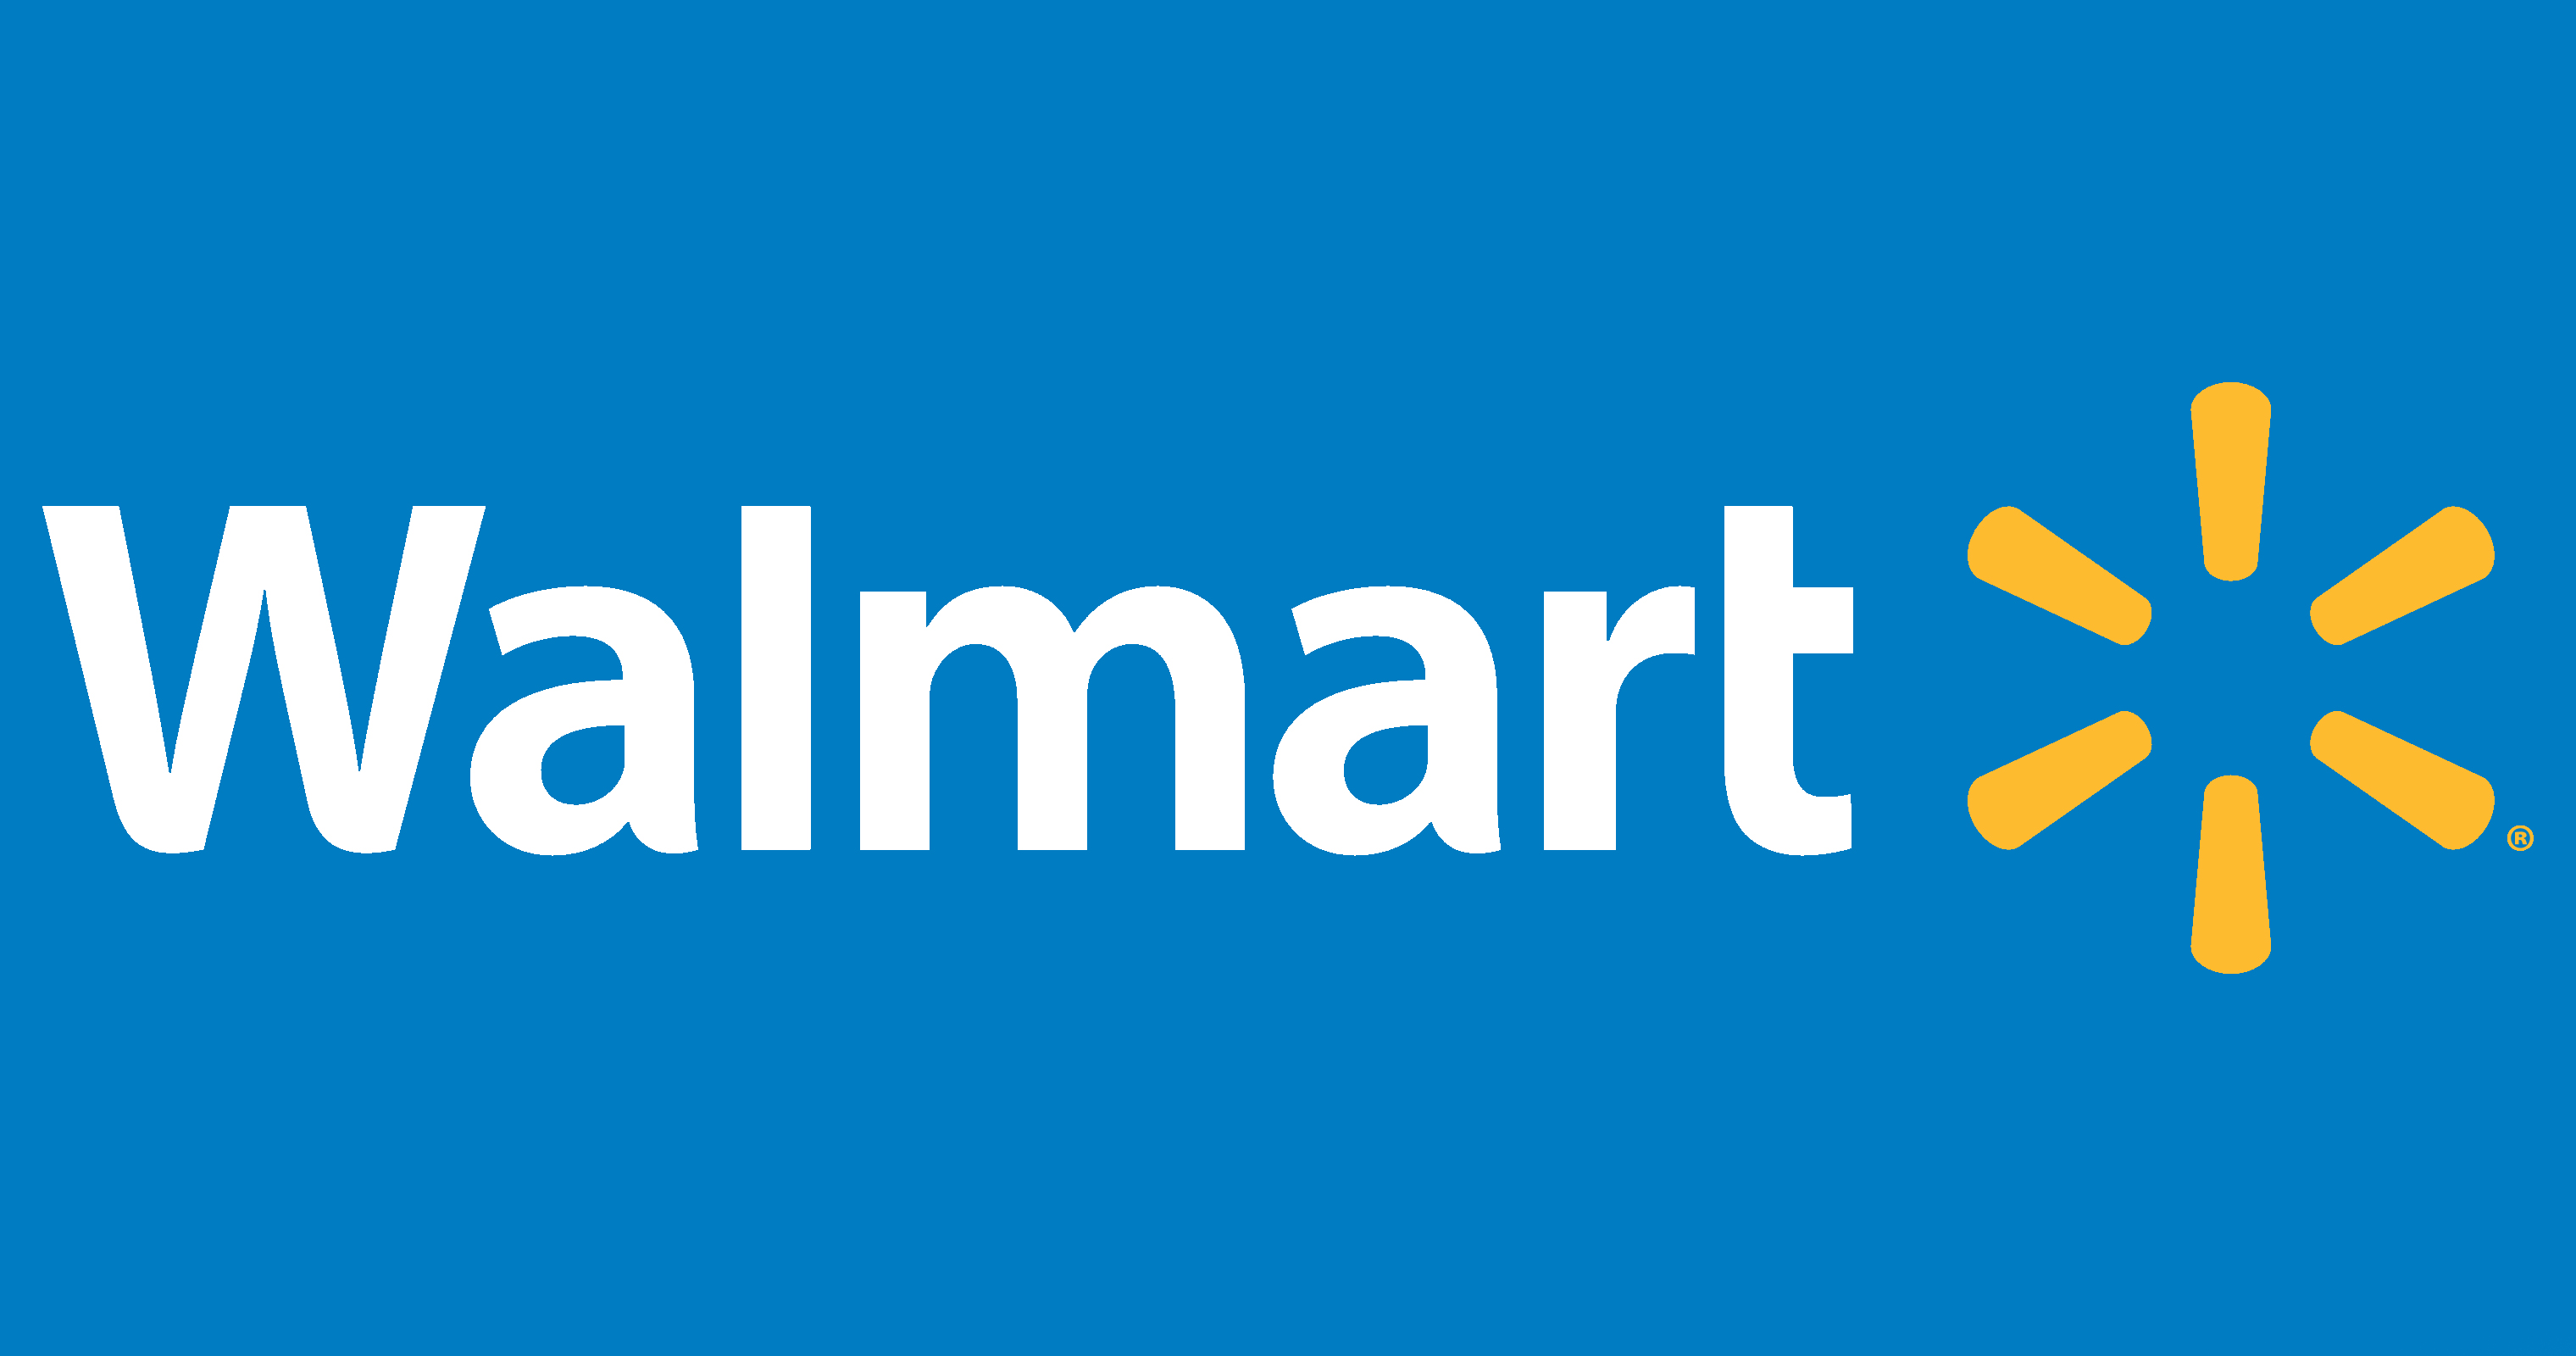

## About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores and  grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior(specifically, purchase amount) against the customer's gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?(Assume 50 million customers are male and 50 million are female)

## About the dataset
The given dataset contains 10 columns.
- User_ID:                User Id
- Product_ID:             Product Id
- Gender:                 Sex of User
- Age:                    Age in bins
- Occupation:             Occupation(Masked)
- City_Category:          Category of the city(A,B,C)
- StayInCurrentCityYears: Number of years stay in current city
- Marital_Status:         Marital Status
- ProductCategory:        Product Category(Masked)
- Purchase:               Purchase Amount

## Importing Libraries

In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
from scipy.stats import norm

## Reading the data

In [231]:
df = pd.read_csv('walmart.txt')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## Datatype of all attributes

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## Shape of the Dataset
The dataset has 10 columns and 550068 rows.

In [233]:
df.shape

(550068, 10)

## Checking for Null values
It is observed that there are no null values.

In [234]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

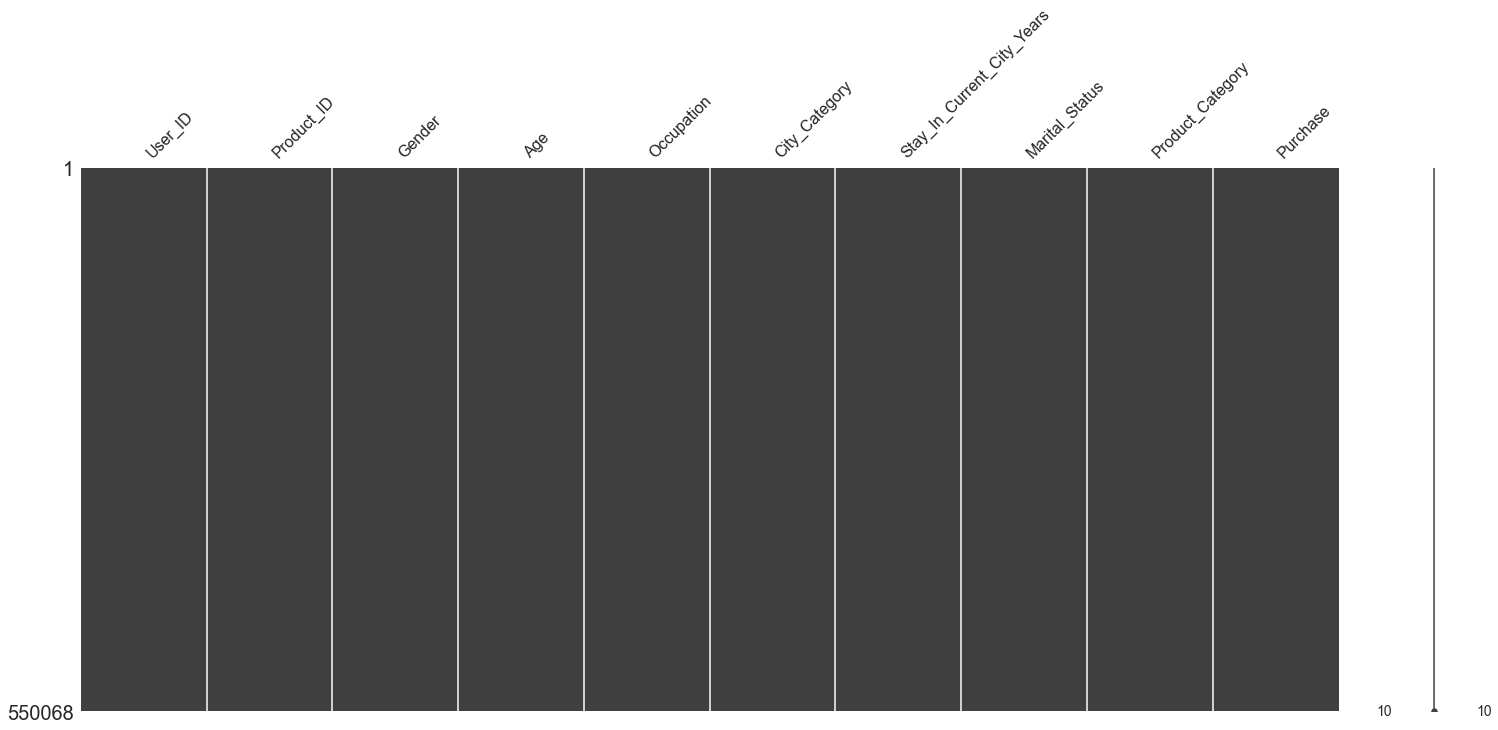

In [235]:
#Missingno library provides a very nice way to visualize the distribution of NaN values.
msno.matrix(df)
plt.show()

## Checking for outliers

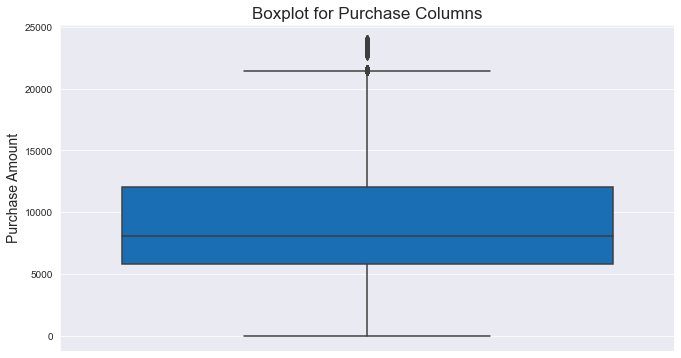

In [236]:
#Checking for outliers in the Purchase Column
plt.figure(figsize = (11,6))
sns.set_style('darkgrid')
plt.title('Boxplot for Purchase Columns',fontsize = 17)
sns.boxplot(data = df,y = 'Purchase',color = '#0071CE')
plt.ylabel('Purchase Amount',fontsize = 14)
plt.show()

## Observations:
- It is observed that purchase columns have some outliers


## Descriptive Analysis of Numerical columns

In [237]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Since we found outliers in Purchase columns,we see that there is a difference in the mean and median.

In [238]:
print('The difference between the mean and median is :',
      np.mean(df['Purchase'])-np.median(df['Purchase']))

The difference between the mean and median is : 1216.9687129591257


# Handling Outliers

In [239]:
q3 = df['Purchase'].quantile(0.75)
q1 = df['Purchase'].quantile(0.25)
iqr = q3-q1
lower = max(0,q1-1.5*iqr)
upper = 1.5*iqr+q3
df = df.loc[(df['Purchase']>=lower)&(df['Purchase']<=upper)]
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## Descriptive Analysis of Categorical Columns

In [240]:
df.describe(include = 'object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,547391,547391,547391,547391,547391
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,412171,218661,230114,192845


## Observations from the above table
- Product_ID has 3631 unique items.
- Age column has 7 unique age groups.
- City_Category has 3 unique categories.
- Gender has two categories Male and Female.
- Stay in current city years 5 unique categories.

# Univariate analysis

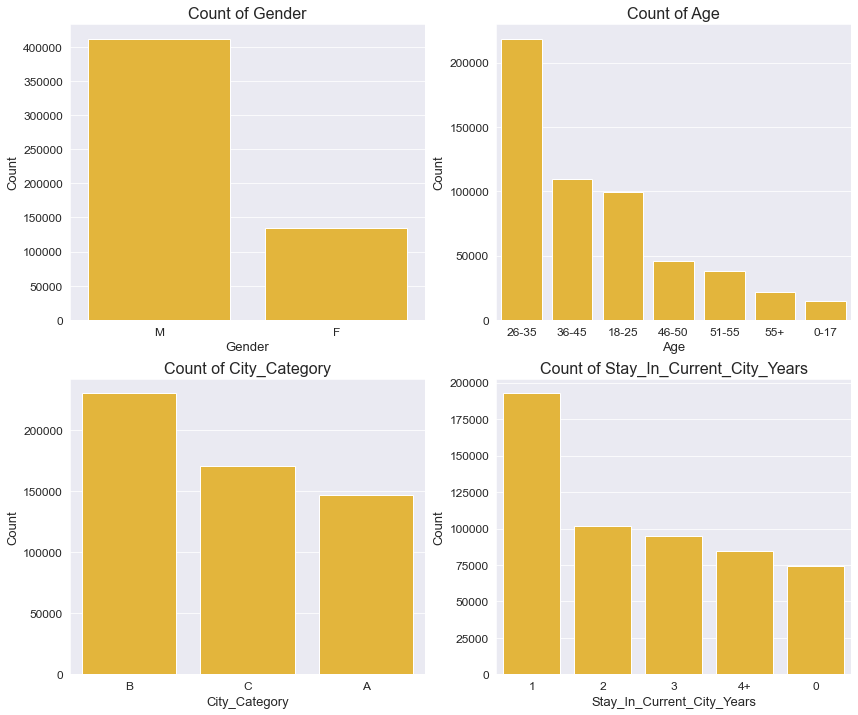

In [241]:
categorical_columns = ['Gender','Age',
                       'City_Category','Stay_In_Current_City_Years']
plt.figure(figsize = (14,25))
c=1
for i in categorical_columns:
    plt.subplot(4,2,c)
    plt.title('Count of '+i,fontsize = 16)
    sns.countplot(data = df,x = i,
                  order = df[i].value_counts().index,color = '#ffc220')
    plt.xlabel(i,fontsize = 13)
    plt.ylabel('Count',fontsize = 13)
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    c+=1
plt.show()

## Observations
- It is observed that most of the customers are males as compared to the number of female customers.
- It is observed that most of the customers belong to the age group of 26-35.
- Most of the customers that visit the store are living in city B.
- Most of the customers that visit the store have lived in the city for 1 year.

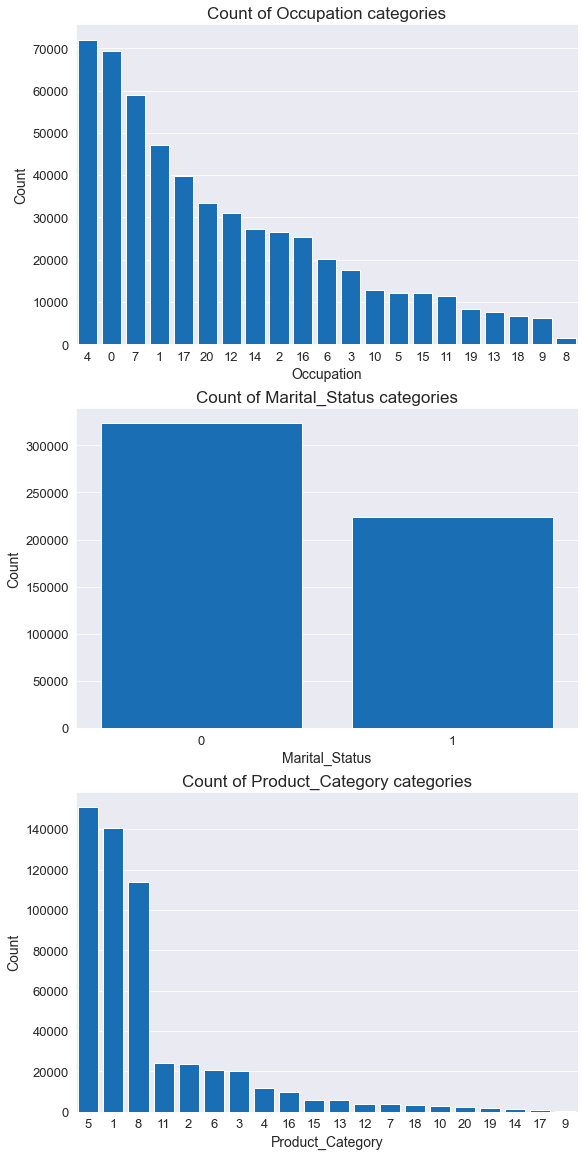

In [242]:
cols = ['Occupation','Marital_Status','Product_Category']
plt.figure(figsize = (9,20))
j = 1
for i in cols:
    plt.subplot(3,1,j)
    sns.countplot(data = df, x = i,
                  order = df[i].value_counts().index,color = '#0071CE')
    plt.title('Count of '+ i +' categories',fontsize = 17)
    plt.xlabel(i,fontsize = 14)
    plt.ylabel('Count',fontsize = 14)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    j+=1
plt.show()

## Observations
- It is observed that the highest number of customers are from category 4 of occupation.
- It is observed that the highest number of customers are from Unmarried category.
- It is observed that the highest number of purchases are from category 5 of product category.

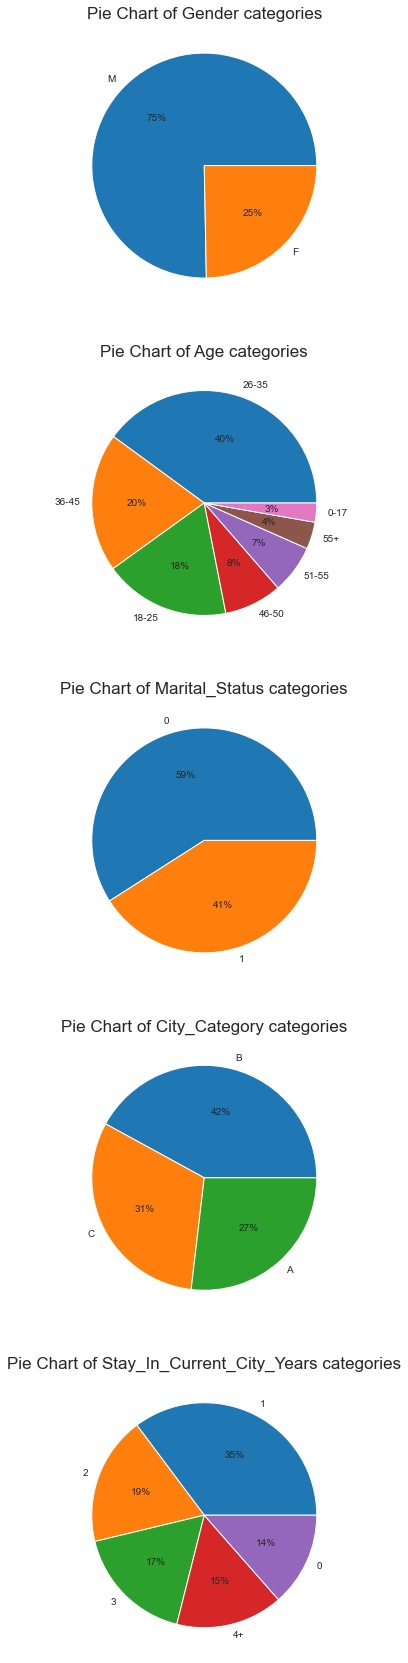

In [243]:
cols = ['Gender','Age','Marital_Status',
        'City_Category','Stay_In_Current_City_Years']
plt.figure(figsize = (9,30))
j = 1
for i in cols:
    plt.subplot(5,1,j)
    x = df[i].value_counts().reset_index(name = 'count')
    plt.pie(x['count'],labels = x['index'],autopct='%0.0f%%')
    plt.title('Pie Chart of '+ i +' categories',fontsize = 17)
    j+=1
plt.show()

## Observations
- Males purchase more than females because 75% of the customers are Males and 25% are females.
- 40% of the purchases are done by customers belonging to the age group 26-35.
- 59% of the customers are single.
- 35% of the customers have lived in the current city for 1 year

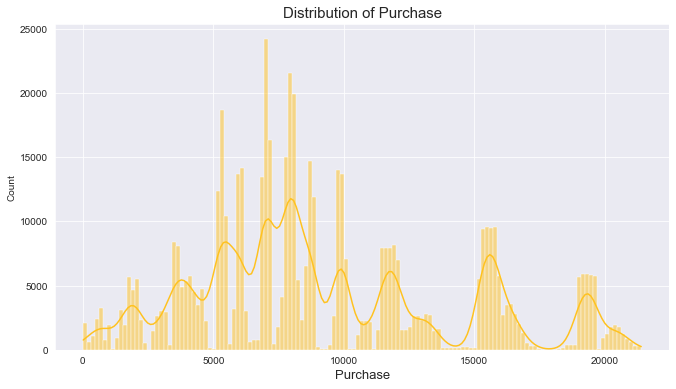

In [244]:
#Histplot for Purchase Amount
plt.figure(figsize = (11,6))
sns.histplot(data = df,kde = True,x = 'Purchase',color = '#ffc220')
plt.title('Distribution of Purchase',fontsize = 15)
plt.xlabel('Purchase',fontsize = 13)
plt.show()

## Observartions
- The distribution looks like right-skewed distibution.

## Bivariate Analysis

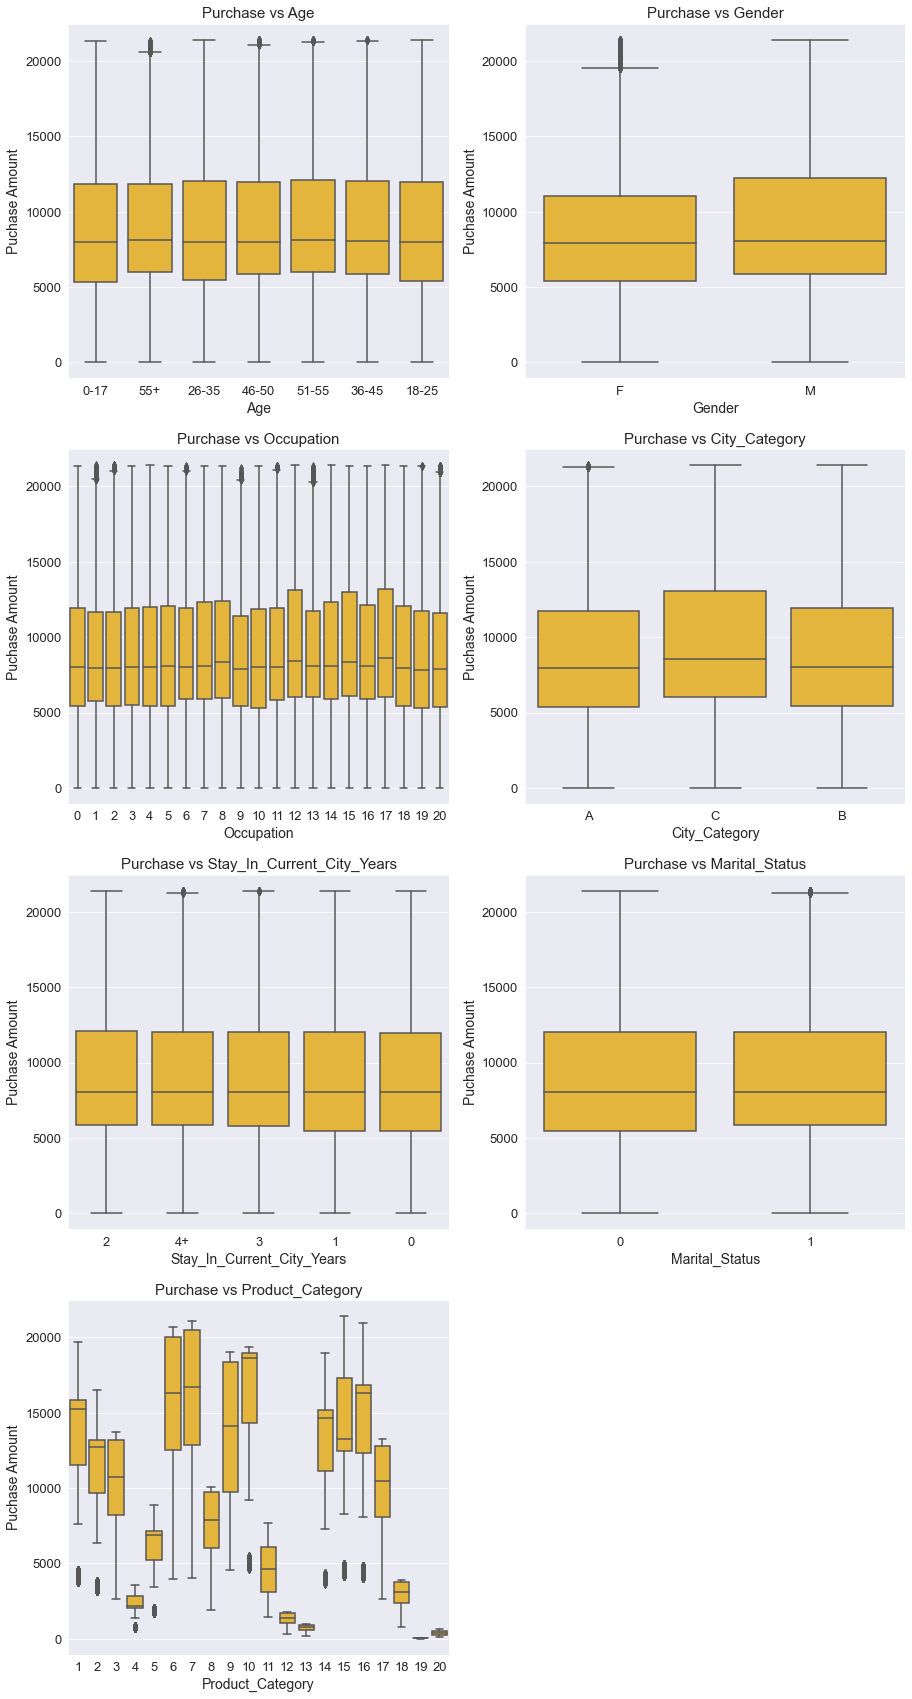

In [245]:
attributes = ['Age','Gender','Occupation','City_Category',
              'Stay_In_Current_City_Years','Marital_Status',
              'Product_Category']
plt.figure(figsize = (15,30))
c = 1
for i in attributes:
    plt.subplot(4,2,c)
    plt.title('Purchase vs '+i,fontsize = 15)
    sns.boxplot(x = i,y = 'Purchase',data = df,color = '#ffc220')
    plt.ylabel('Puchase Amount',fontsize = 14)
    plt.xlabel(i,fontsize = 14)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    c+=1
plt.show()

In [246]:
df.groupby('Product_Category')['Purchase'].aggregate(['median','mean'])

,median,mean
Product_Category,,
1,15245.0,13606.218596
2,12728.5,11251.935384
3,10742.0,10096.705734
4,2175.0,2329.659491
5,6912.0,6240.088178
6,16312.0,15838.478550
7,16700.0,16365.689600
8,7905.0,7498.958078
9,14094.0,13852.325373


In [247]:
df.groupby('Age')['Purchase'].aggregate(['median','mean'])

,median,mean
Age,,
0-17,7974.5,8867.447046
18-25,8020.0,9124.031731
26-35,8021.0,9193.469924
36-45,8051.0,9254.202214
46-50,8025.0,9128.985080
51-55,8118.0,9423.121704
55+,8092.5,9216.650220


In [248]:
df.groupby('Gender')['Purchase'].aggregate(['median','mean'])

,median,mean
Gender,,
F,7906.0,8671.049039
M,8089.0,9367.724355


In [249]:
df.groupby('Occupation')['Purchase'].aggregate(['median','mean'])

,median,mean
Occupation,,
0,7992.0,9057.506291
1,7958.0,8876.457053
2,7941.0,8869.590505
3,7998.0,9112.929019
4,8036.0,9161.759189
5,8073.0,9283.268854
6,8044.0,9191.133261
7,8060.0,9365.188025
8,8362.0,9479.513636


In [250]:
df.groupby('City_Category')['Purchase'].aggregate(['median','mean'])

,median,mean
City_Category,,
A,7922.0,8845.367393
B,7996.0,9086.502707
C,8571.0,9645.647300


In [251]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].aggregate(
    ['median','mean'])

,median,mean
Stay_In_Current_City_Years,,
0,8017.0,9111.331555
1,8032.0,9179.275916
2,8063.5,9258.292028
3,8037.0,9215.953451
4+,8043.0,9208.837895


In [252]:
df.groupby('Marital_Status')['Purchase'].aggregate(['median','mean'])

,median,mean
Marital_Status,,
0,8035.0,9201.581849
1,8042.0,9187.040076


## Observations
- Product Category 10 is more likely to be purchased since it has highest average and median.
- Age group 51-55 are more likely to buy since they have the highest purchase amount average and median.
- On an average males customers are more likely to buy than female customers.
- On an average cutomers whose occupation is 17 is more likely to buy.
- Customers from city C have the highest purchases.
- Customers who lived in the current city for 2 years have the highest purchases.


## Multivariate Analysis

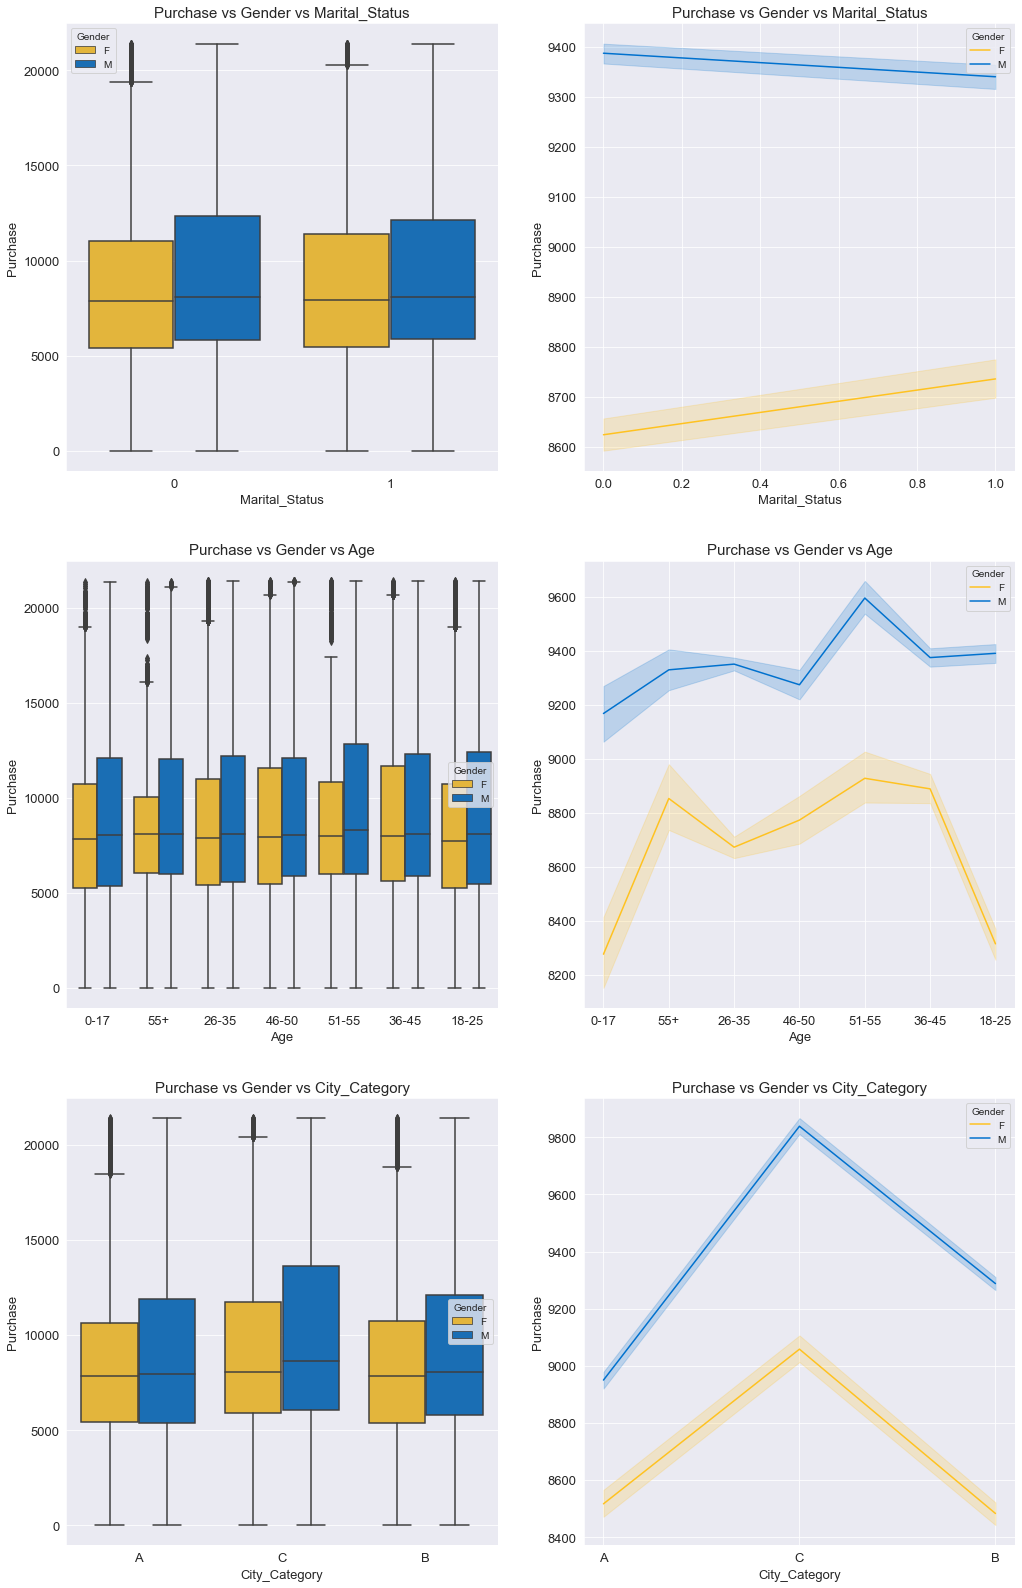

In [253]:
attr2 = ['Marital_Status','Age','City_Category']
plt.figure(figsize = (17,28))
c = 1
for j in attr2:
    #Box Plot
    plt.subplot(3,2,c)
    plt.title('Purchase vs Gender'+' vs '+j,fontsize =15 )
    sns.boxplot(data = df, x = j,y = 'Purchase',hue = 'Gender',
                palette = ['#ffc220','#0071CE'])
    plt.xlabel(j,fontsize = 13)
    plt.ylabel('Purchase',fontsize = 13)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    c+=1
    
    #Line plot
    plt.subplot(3,2,c)
    plt.title('Purchase vs Gender'+' vs '+j,fontsize =15 )
    sns.lineplot(data = df, x = j,y = 'Purchase',hue = 'Gender',
                palette = ['#ffc220','#0071CE'])
    plt.xlabel(j,fontsize = 13)
    plt.ylabel('Purchase',fontsize = 13)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    c+=1
plt.show()

## Observations
- Most of the customers are Males.
- Purchases made by male customers is always greater than female customers in all age groups.
- In category C city most of the customers are males.

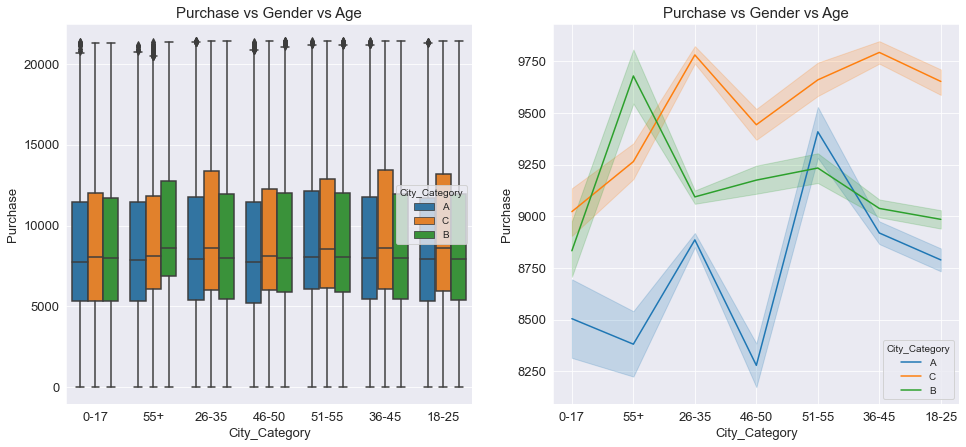

In [254]:
attr2 = ['Age']
plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
plt.title('Purchase vs Gender vs Age',fontsize =15 )
sns.boxplot(data = df, x = 'Age',y = 'Purchase',hue = 'City_Category')
plt.xlabel(j,fontsize = 13)
plt.ylabel('Purchase',fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)


#Line plot
plt.subplot(1,2,2)
plt.title('Purchase vs Gender vs Age',fontsize =15 )
sns.lineplot(data = df, x = 'Age',y = 'Purchase',hue = 'City_Category')
plt.xlabel(j,fontsize = 13)
plt.ylabel('Purchase',fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

## Observations

- Most of the customers living in City C are from the age group 18-45.
- Most of the customers living in City B are from the age group 55+.
- Most of the customers living in City A are from the age group 51-55.
- Purchases in city C are the highest.

# Correlation between different Attributes


## Heatmap

<AxesSubplot:>

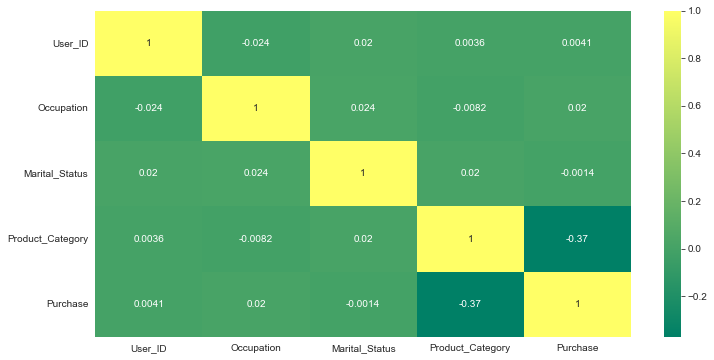

In [255]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True,cmap = 'summer')

## Pairplot

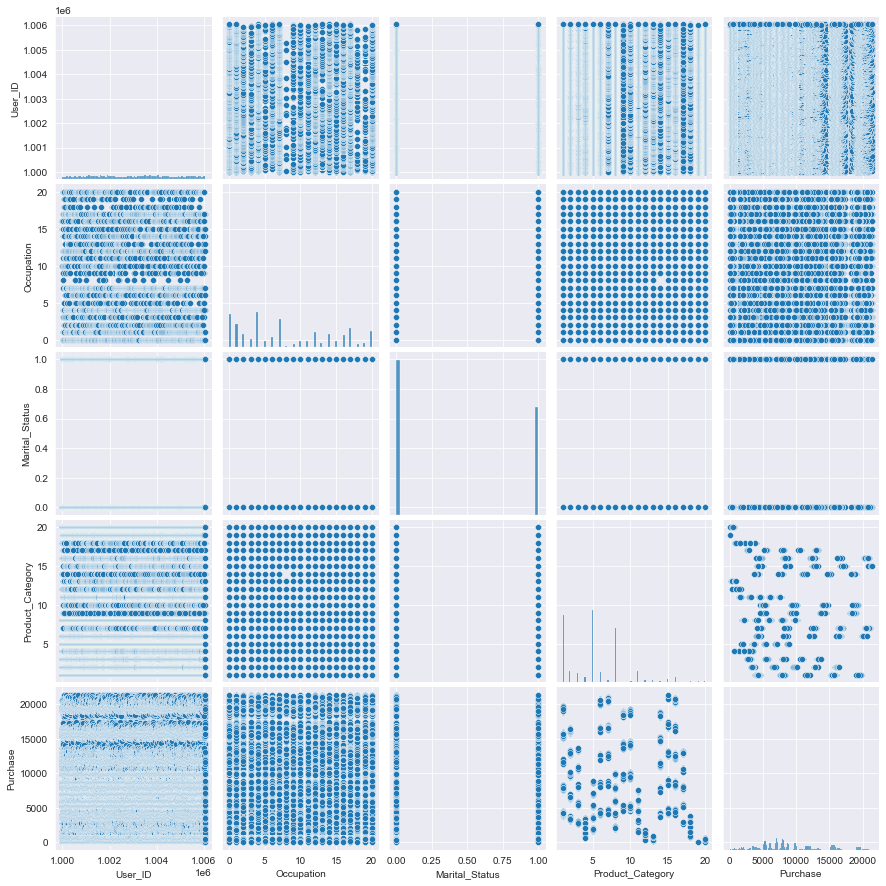

In [256]:
sns.pairplot(data = df)

## Observations
- From the above two graphs it is clear that there is no correlation between the attributes.

## Finding the avg amount spent per customer for Male and Female from the given data

In [257]:
df_male = df.loc[df['Gender']=='M','Purchase']
df_female = df.loc[df['Gender']=='F','Purchase']

In [258]:
male_avg_purchase = df_male.mean()
female_avg_purchase = df_female.mean()
print('Average purchase amount of Male Customers : ',
      np.round(male_avg_purchase,3))
print('Avrage purchse amount of Female Customers : ',
      np.round(female_avg_purchase,3))

Average purchase amount of Male Customers :  9367.724
Avrage purchse amount of Female Customers :  8671.049


## Observation
From the given data we see that male customers on average spend more than female customres.

## Using sample average to find out the within which the population average will lie.

# Finding the population mean of Purchase Amount using CLT with 90% confidence - Based on Gender 

Analysis of True mean of Purchase amount by gender with a 90% confidence with varying sample sizes.


In [259]:
def bootstrap(samp1,samp2,smpl_size,ci):
    b_mean_samp1 = []
    b_mean_samp2 = []
    for i in range(1000):
        bootstrap_samp1 = np.random.choice(samp1,size = smpl_size)
        bootstrap_samp2 = np.random.choice(samp2,size = smpl_size)
        b_mean_samp1.append(np.mean(bootstrap_samp1))
        b_mean_samp2.append(np.mean(bootstrap_samp2))
        
    alpha_l = (100-ci)/2
    alpha_r = ci+alpha_l
    
    #Calculating the mean,std_dev and std_error of sample1
    samp1_mean = np.mean(b_mean_samp1)
    samp1_std_dev = np.std(b_mean_samp1)
    samp1_std_error = stats.sem(b_mean_samp1)
    
    #Calculating the mean,std_dev and Std_error of sample2
    samp2_mean = np.mean(b_mean_samp2)
    samp2_std_dev = np.std(b_mean_samp2)
    samp2_std_error = stats.sem(b_mean_samp2)
    
    #Calculating the lower limit and upper limit values for sample 1
    ll_1 = np.percentile(b_mean_samp1,alpha_l)
    ul_1 = np.percentile(b_mean_samp1,alpha_r)
    
    #Calculating the lower limit and upper limit values for sample 2
    ll_2 = np.percentile(b_mean_samp2,alpha_l)
    ul_2 = np.percentile(b_mean_samp2,alpha_r)
    
    fig,ax = plt.subplots(figsize = (12,6))
    sns.kdeplot(data = b_mean_samp1,color = '#ffc220',fill = True)
    sns.kdeplot(data = b_mean_samp2,color = '#0071CE',fill = True)
    
    label_mean1=("μ (Males) : {:.2f}".format(samp1_mean))
    label_1=("Lower Limit(M): {:.2f}\nUpper Limit(M): {:.2f}".format(ll_1,ul_1))
    label_mean2=("μ (Females): {:.2f}".format(samp2_mean))
    label_2=("Lower Limit(F): {:.2f}\nUpper Limit(F): {:.2f}".format(ll_2,ul_2))
    
    plt.title(
        f"Sample size :{smpl_size},m_error:{np.round(samp1_std_error,2)},f_error:{np.round(samp2_std_error,2)}",fontsize = 15)
    plt.axvline(ul_1,color = 'r',label = label_1)
    plt.axvline(ll_1,color = 'r')
    plt.axvline(ll_2,color = 'g',label = label_2)
    plt.axvline(ul_2,color = 'g')
    plt.axvline(samp1_mean,color = 'y',linestyle = 'dashdot',linewidth = 2,label = label_mean1)
    plt.axvline(samp2_mean,color = 'b',linestyle = 'dashdot',linewidth = 2,label = label_mean2)
    plt.xlabel('Purchase',fontsize = 13)
    plt.legend(loc='upper right')
    plt.show()
    return samp1_mean,samp2_mean,ll_1,ul_1,ll_2,ul_2

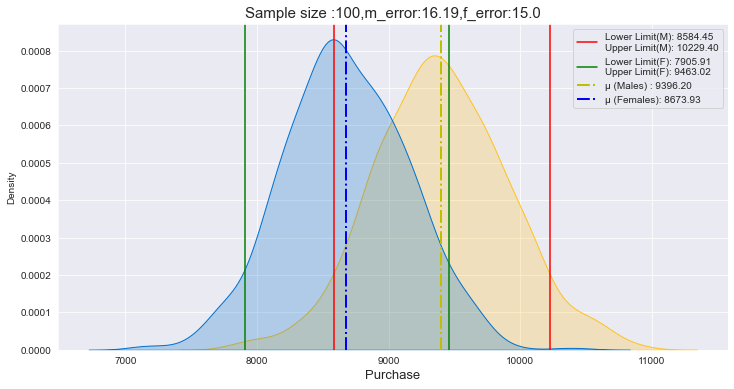

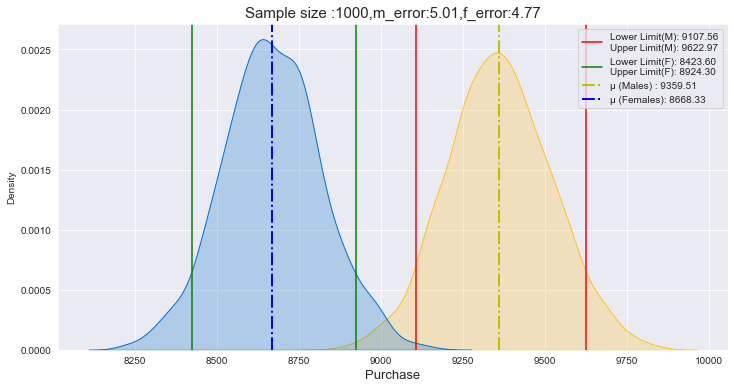

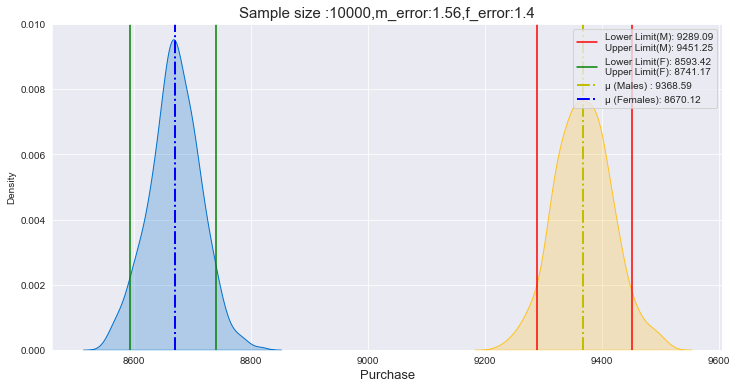

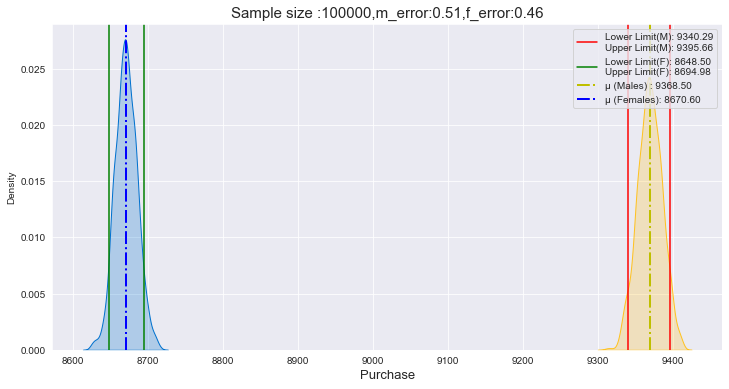

In [260]:
sample_sizes = [100,1000,10000,100000]
ci = 90
clt_90 = pd.DataFrame({'Gender':[],
                      'Sample_Size':[],
                      'Lower_Limit':[],
                      'Upper_Limit':[],
                      'Range':[],
                      'Confidence_Perc':[]})
for i in sample_sizes:
    male_avg,female_avg,ll_male,ul_male,ll_female,ul_female = bootstrap(
        df_male,df_female,i,ci)
    new_row1 = {'Gender':'M','Sample_Size':i,'Lower_Limit':ll_male,
                'Upper_Limit':ul_male,'Range':ul_male-ll_male,
                'Confidence_Perc':ci}
    clt_90 = clt_90.append(new_row1,ignore_index = True)
    new_row2 = {'Gender':'F','Sample_Size':i,'Lower_Limit':ll_female,
                'Upper_Limit':ul_female,'Range':ul_female-ll_female,
                'Confidence_Perc':ci}
    clt_90 = clt_90.append(new_row2,ignore_index = True)
    

In [261]:
clt_90.loc[clt_90['Gender'] == 'M'] 

,Gender,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
0,M,100.0,8584.446000,10229.395500,1644.949500,90.0
2,M,1000.0,9107.561450,9622.968850,515.407400,90.0
4,M,10000.0,9289.088555,9451.251550,162.162995,90.0
6,M,100000.0,9340.290745,9395.655808,55.365063,90.0


In [262]:
clt_90.loc[clt_90['Gender']=='F']

,Gender,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
1,F,100.0,7905.906000,9463.017500,1557.111500,90.0
3,F,1000.0,8423.602000,8924.297500,500.695500,90.0
5,F,10000.0,8593.422595,8741.168045,147.745450,90.0
7,F,100000.0,8648.501774,8694.984976,46.483202,90.0


## Observations
- As the sample size increases the standard error decreases.
- With increasing sample size, the two group starts to become distinct.
- For Males (Sample size = 100000) range for mean purchase with 90% confidence is 9341.441677 - 9394.877773
- For Females (Sample size = 100000) range for mean purchase with 90% confidence is 8645.454164 - 8693.812386

# Finding the population mean of Purchase Amount using CLT with 95% confidence - Based on Gender 

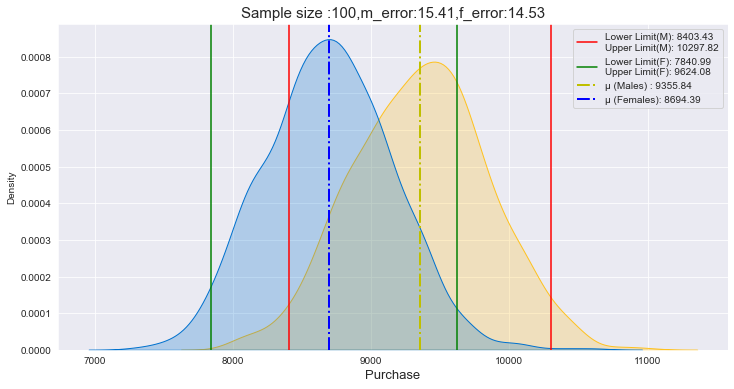

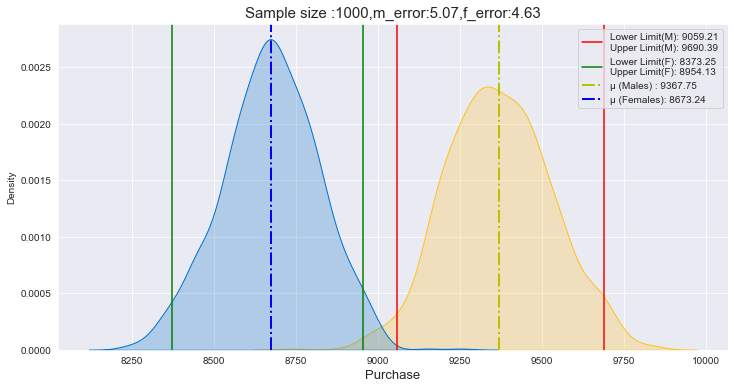

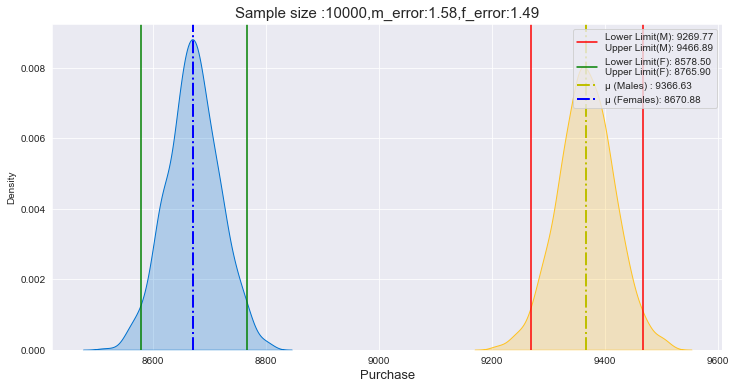

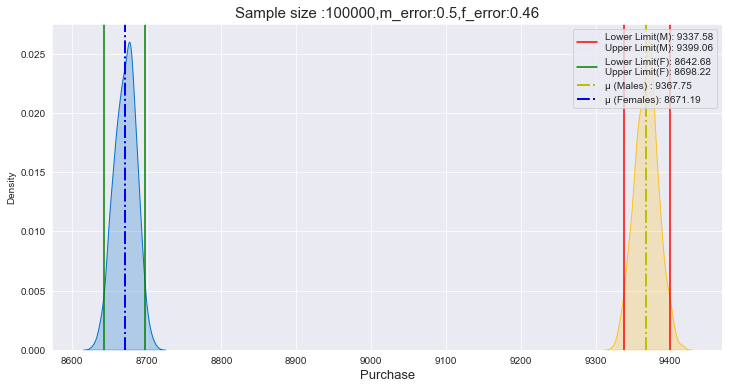

In [263]:
sample_sizes = [100,1000,10000,100000]
ci = 95
clt_95 = pd.DataFrame({'Gender':[],
                      'Sample_Size':[],
                      'Lower_Limit':[],
                      'Upper_Limit':[],
                      'Range':[],
                      'Confidence_Perc':[]})
for i in sample_sizes:
    male_avg,female_avg,ll_male,ul_male,ll_female,ul_female = bootstrap(
        df_male,df_female,i,ci)
    new_row1 = {'Gender':'M','Sample_Size':i,'Lower_Limit':ll_male,
                'Upper_Limit':ul_male,'Range':ul_male-ll_male,
                'Confidence_Perc':ci}
    clt_95 = clt_95.append(new_row1,ignore_index = True)
    new_row2 = {'Gender':'F','Sample_Size':i,'Lower_Limit':ll_female,
                'Upper_Limit':ul_female,'Range':ul_female-ll_female,
                'Confidence_Perc':ci}
    clt_95 = clt_95.append(new_row2,ignore_index = True)

In [264]:
clt_95.loc[clt_95['Gender']=='M']

,Gender,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
0,M,100.0,8403.425250,10297.820000,1894.394750,95.0
2,M,1000.0,9059.211650,9690.394825,631.183175,95.0
4,M,10000.0,9269.774755,9466.889152,197.114398,95.0
6,M,100000.0,9337.578828,9399.061419,61.482591,95.0


In [265]:
clt_95.loc[clt_95['Gender']=='F']

,Gender,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
1,F,100.0,7840.988250,9624.082500,1783.094250,95.0
3,F,1000.0,8373.247100,8954.130600,580.883500,95.0
5,F,10000.0,8578.495860,8765.897473,187.401613,95.0
7,F,100000.0,8642.683766,8698.216332,55.532566,95.0


## Observations
- With increasing sample size the standard error decreases and the male and female group starts to be distinct.
- Overlappings are increasing with a confidence interval of 95% because on increasing the CI we are considering higher ranges within which the actual population mean might fall. We have observed that for the same sample size with increasing CI the range also increases.
- For Males (Sample size = 100000) range for mean purchase with 95% confidence is 9336.449701 - 9399.932446
- For Females (Sample size = 100000) range for mean purchase with 95% confidence is 8643.305857 - 8700.044039

# Finding the population mean of Purchase Amount using CLT with 99% confidence - Based on Gender

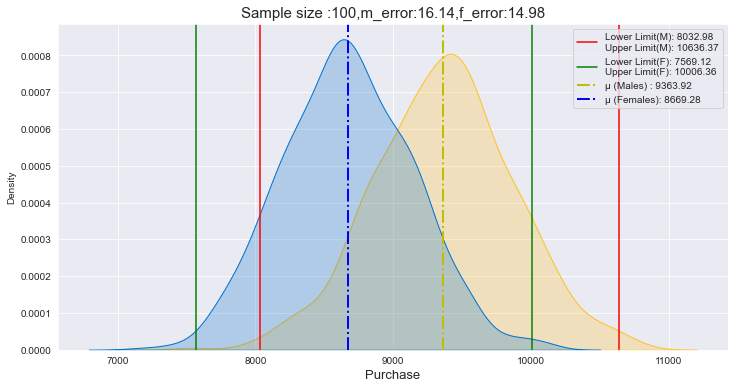

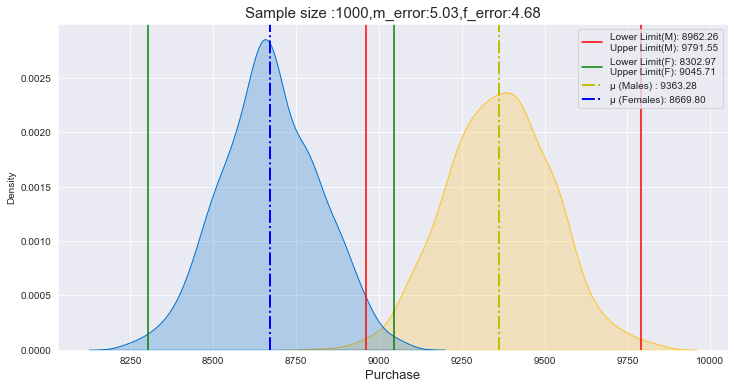

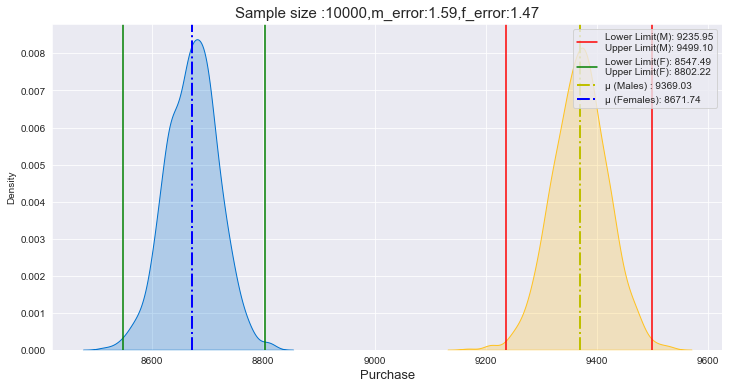

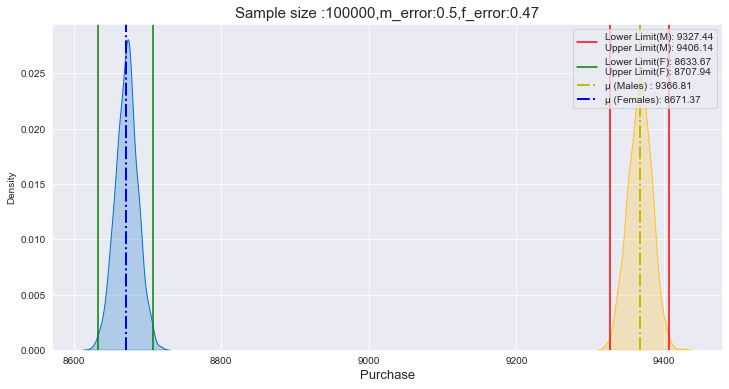

In [266]:
sample_sizes = [100,1000,10000,100000]
ci = 99
clt_99 = pd.DataFrame({'Gender':[],
                      'Sample_Size':[],
                      'Lower_Limit':[],
                      'Upper_Limit':[],
                      'Range':[],
                      'Confidence_Perc':[]})
for i in sample_sizes:
    male_avg,female_avg,ll_male,ul_male,ll_female,ul_female = bootstrap(
        df_male,df_female,i,ci)
    new_row1 = {'Gender':'M','Sample_Size':i,'Lower_Limit':ll_male,
                'Upper_Limit':ul_male,'Range':ul_male-ll_male,
                'Confidence_Perc':ci}
    clt_99 = clt_99.append(new_row1,ignore_index = True)
    new_row2 = {'Gender':'F','Sample_Size':i,'Lower_Limit':ll_female,
                'Upper_Limit':ul_female,'Range':ul_female-ll_female,
                'Confidence_Perc':ci}
    clt_99 = clt_99.append(new_row2,ignore_index = True)

In [267]:
clt_99.loc[clt_99['Gender']=='M']

,Gender,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
0,M,100.0,8032.979400,10636.372900,2603.393500,99.0
2,M,1000.0,8962.260600,9791.552210,829.291610,99.0
4,M,10000.0,9235.952315,9499.102065,263.149751,99.0
6,M,100000.0,9327.441310,9406.144972,78.703662,99.0


In [268]:
clt_99.loc[clt_99['Gender']=='F']

,Gender,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
1,F,100.0,7569.117600,10006.363650,2437.246050,99.0
3,F,1000.0,8302.971190,9045.712080,742.740890,99.0
5,F,10000.0,8547.491855,8802.219989,254.728134,99.0
7,F,100000.0,8633.671740,8707.941233,74.269493,99.0


In [269]:
clt = clt_90.append(clt_95)
clt = clt.append(clt_99)
clt.loc[clt['Gender']=='M']

,Gender,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
0,M,100.0,8584.446000,10229.395500,1644.949500,90.0
2,M,1000.0,9107.561450,9622.968850,515.407400,90.0
4,M,10000.0,9289.088555,9451.251550,162.162995,90.0
6,M,100000.0,9340.290745,9395.655808,55.365063,90.0
0,M,100.0,8403.425250,10297.820000,1894.394750,95.0
2,M,1000.0,9059.211650,9690.394825,631.183175,95.0
4,M,10000.0,9269.774755,9466.889152,197.114398,95.0
6,M,100000.0,9337.578828,9399.061419,61.482591,95.0
0,M,100.0,8032.979400,10636.372900,2603.393500,99.0
2,M,1000.0,8962.260600,9791.552210,829.291610,99.0


In [270]:
clt.loc[clt['Gender']=='F']

,Gender,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
1,F,100.0,7905.906000,9463.017500,1557.111500,90.0
3,F,1000.0,8423.602000,8924.297500,500.695500,90.0
5,F,10000.0,8593.422595,8741.168045,147.745450,90.0
7,F,100000.0,8648.501774,8694.984976,46.483202,90.0
1,F,100.0,7840.988250,9624.082500,1783.094250,95.0
3,F,1000.0,8373.247100,8954.130600,580.883500,95.0
5,F,10000.0,8578.495860,8765.897473,187.401613,95.0
7,F,100000.0,8642.683766,8698.216332,55.532566,95.0
1,F,100.0,7569.117600,10006.363650,2437.246050,99.0
3,F,1000.0,8302.971190,9045.712080,742.740890,99.0


## Observations
- With increasing sample size the standard error decreases and the male and female group starts to be distinct.
- Overlappings are increasing with a confidence interval of 99% because on increasing the CI we are considering higher ranges within which the actual population mean might fall. We have observed that for the same sample size with increasing CI the range also increases.
- For Males (Sample size = 100000) range for mean purchase with 95% confidence is 9326.673746 - 9407.495367
- For Females (Sample size = 100000) range for mean purchase with 95% confidence is 8636.678258	 - 8708.486877.

# Calculating Confidence Interval for estimating mean purchase amount based on Marital-Status - with 90% confidence

In [271]:
df_married = df.loc[df['Marital_Status']==1,'Purchase']
df_unmarried = df.loc[df['Marital_Status']==0,'Purchase']

In [272]:
print('Average Purchase amount of Married Couples :',np.mean(df_married))
print('Average Purchase amount of Unmarried Customers :',np.mean(df_unmarried))

Average Purchase amount of Married Couples : 9187.040076020861
Average Purchase amount of Unmarried Customers : 9201.581848893398


In [273]:
def confidence_marriage(samp1,samp2,smpl_size,ci):
    b_mean_samp1 = []
    b_mean_samp2 = []
    for i in range(1000):
        bootstrap_samp1 = np.random.choice(samp1,size = smpl_size)
        bootstrap_samp2 = np.random.choice(samp2,size = smpl_size)
        b_mean_samp1.append(np.mean(bootstrap_samp1))
        b_mean_samp2.append(np.mean(bootstrap_samp2))
        
    alpha_l = (100-ci)/2
    alpha_r = ci+alpha_l
    
    #Calculating the mean,std_dev and std_error of sample1
    samp1_mean = np.mean(b_mean_samp1)
    samp1_std_dev = np.std(b_mean_samp1)
    samp1_std_error = stats.sem(b_mean_samp1)
    
    #Calculating the mean,std_dev and Std_error of sample2
    samp2_mean = np.mean(b_mean_samp2)
    samp2_std_dev = np.std(b_mean_samp2)
    samp2_std_error = stats.sem(b_mean_samp2)
    
    #Calculating the lower limit and upper limit values for sample 1
    ll_1 = np.percentile(b_mean_samp1,alpha_l)
    ul_1 = np.percentile(b_mean_samp1,alpha_r)
    
    #Calculating the lower limit and upper limit values for sample 2
    ll_2 = np.percentile(b_mean_samp2,alpha_l)
    ul_2 = np.percentile(b_mean_samp2,alpha_r)
    
    fig,ax = plt.subplots(figsize = (12,6))
    sns.kdeplot(data = b_mean_samp1,color = '#ffc220',fill = True)
    sns.kdeplot(data = b_mean_samp2,color = '#0071CE',fill = True)
    
    label_mean1=("μ (Married) : {:.2f}".format(samp1_mean))
    label_1=("Lower Limit(Married): {:.2f}\nUpper Limit(Married): {:.2f}".format(ll_1,ul_1))
    label_mean2=("μ (Unmarried): {:.2f}".format(samp2_mean))
    label_2=("Lower Limit(Unmarried): {:.2f}\nUpper Limit(Unmarried): {:.2f}".format(ll_2,ul_2))
    
    plt.title(
        f"Sample size :{smpl_size},m_error:{np.round(samp1_std_error,2)},um_error:{np.round(samp2_std_error,2)}",fontsize = 15)
    plt.axvline(ul_1,color = 'r',label = label_1)
    plt.axvline(ll_1,color = 'r')
    plt.axvline(ll_2,color = 'g',label = label_2)
    plt.axvline(ul_2,color = 'g')
    plt.axvline(samp1_mean,color = 'y',linestyle = 'dashdot',linewidth = 2,label = label_mean1)
    plt.axvline(samp2_mean,color = 'b',linestyle = 'dashdot',linewidth = 2,label = label_mean2)
    plt.xlabel('Purchase',fontsize = 13)
    plt.legend(loc='upper right')
    plt.show()
    return samp1_mean,samp2_mean,ll_1,ul_1,ll_2,ul_2    

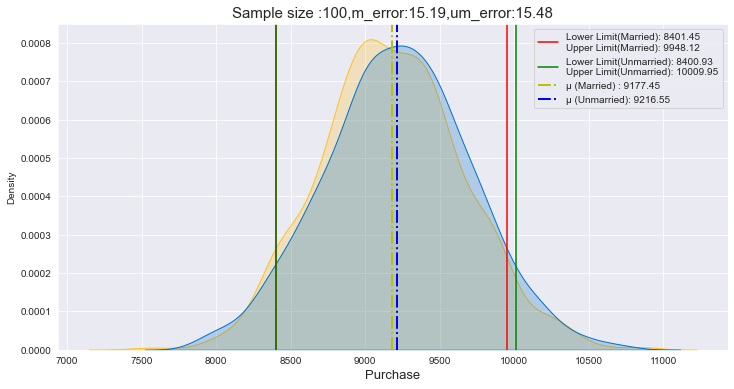

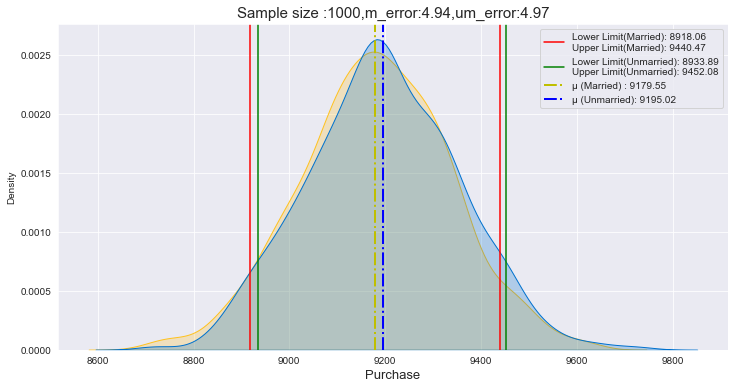

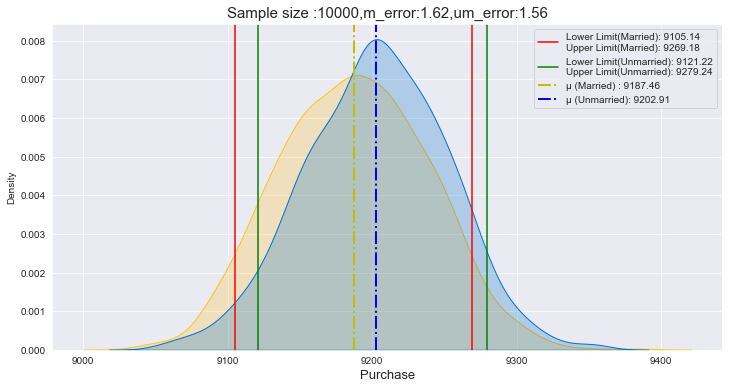

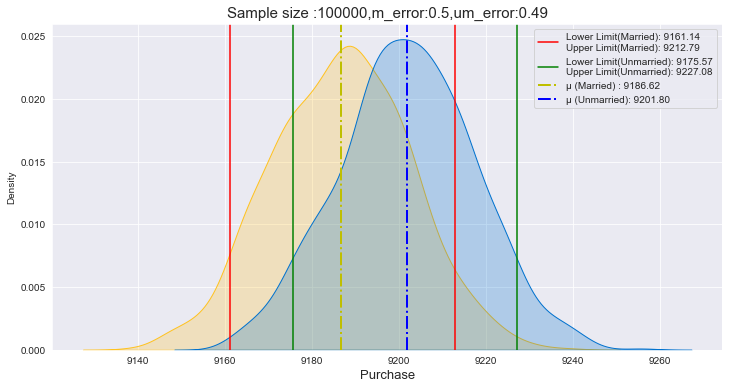

In [274]:
sample_sizes = [100,1000,10000,100000]
ci = 90
clt_m_um_90 = pd.DataFrame({'Marital_Status':[],
                      'Sample_Size':[],
                      'Lower_Limit':[],
                      'Upper_Limit':[],
                      'Range':[],
                      'Confidence_Perc':[]})
for i in sample_sizes:
    m_avg,um_avg,ll_m,ul_m,ll_um,ul_um = confidence_marriage(
        df_married,df_unmarried,i,ci
    )
    new_row1 = {'Marital_Status':'Married','Sample_Size':i,'Lower_Limit':ll_m,
                'Upper_Limit':ul_m,'Range':ul_m-ll_m,
                'Confidence_Perc':ci}
    clt_m_um_90 = clt_m_um_90.append(new_row1,ignore_index = True)
    new_row2 = {'Marital_Status':'Unmarried','Sample_Size':i,'Lower_Limit':ll_um,
                'Upper_Limit':ul_um,'Range':ul_um-ll_um,
                'Confidence_Perc':ci}
    clt_m_um_90 = clt_m_um_90.append(new_row2,ignore_index = True)

In [275]:
clt_m_um_90.loc[clt_m_um_90['Marital_Status']=='Married']

,Marital_Status,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
0,Married,100.0,8401.447500,9948.120000,1546.672500,90.0
2,Married,1000.0,8918.056500,9440.466250,522.409750,90.0
4,Married,10000.0,9105.140590,9269.184335,164.043745,90.0
6,Married,100000.0,9161.142303,9212.787082,51.644779,90.0


In [276]:
clt_m_um_90.loc[clt_m_um_90['Marital_Status']=='Unmarried']

,Marital_Status,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
1,Unmarried,100.0,8400.933000,10009.946500,1609.013500,90.0
3,Unmarried,1000.0,8933.886350,9452.082100,518.195750,90.0
5,Unmarried,10000.0,9121.215100,9279.242535,158.027435,90.0
7,Unmarried,100000.0,9175.574926,9227.078647,51.503721,90.0


# Calculating Confidence Interval for estimating mean purchase amount based on Marital-Status - with 99% confidence

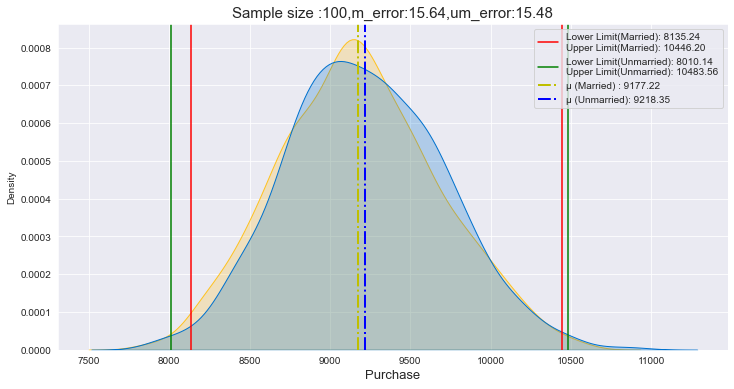

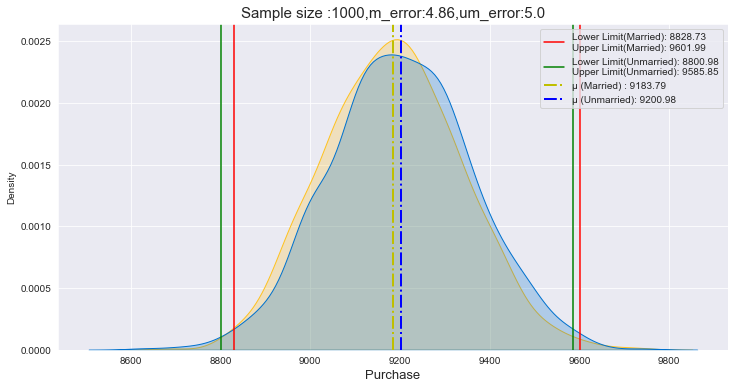

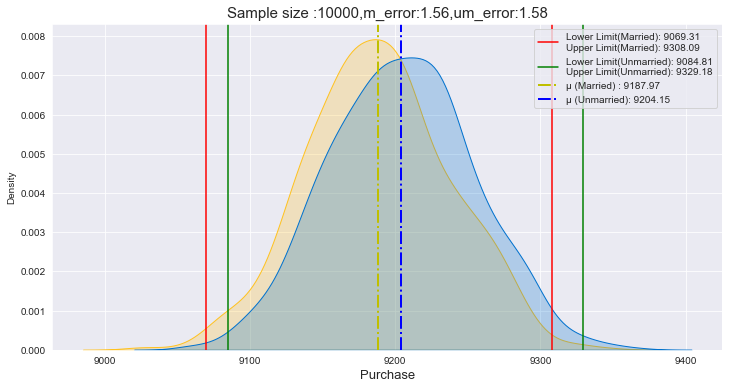

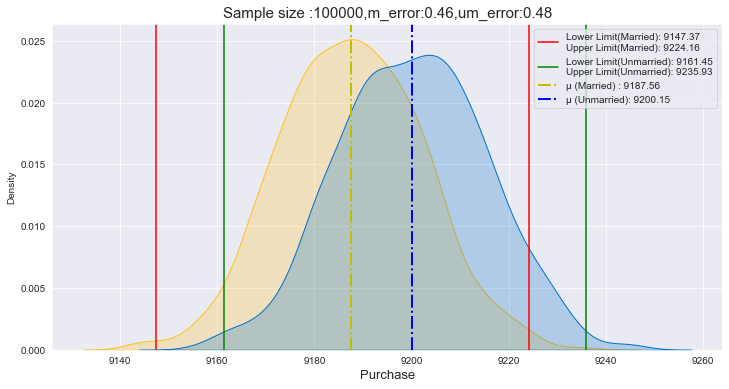

In [277]:
sample_sizes = [100,1000,10000,100000]
ci = 99
clt_m_um_99 = pd.DataFrame({'Marital_Status':[],
                      'Sample_Size':[],
                      'Lower_Limit':[],
                      'Upper_Limit':[],
                      'Range':[],
                      'Confidence_Perc':[]})
for i in sample_sizes:
    m_avg,um_avg,ll_m,ul_m,ll_um,ul_um = confidence_marriage(
        df_married,df_unmarried,i,ci
    )
    new_row1 = {'Marital_Status':'Married','Sample_Size':i,'Lower_Limit':ll_m,
                'Upper_Limit':ul_m,'Range':ul_m-ll_m,
                'Confidence_Perc':ci}
    clt_m_um_99 = clt_m_um_99.append(new_row1,ignore_index = True)
    new_row2 = {'Marital_Status':'Unmarried','Sample_Size':i,'Lower_Limit':ll_um,
                'Upper_Limit':ul_um,'Range':ul_um-ll_um,
                'Confidence_Perc':ci}
    clt_m_um_99 = clt_m_um_99.append(new_row2,ignore_index = True)

In [278]:
clt_m_um_99.loc[clt_m_um_99['Marital_Status']=='Married']

,Marital_Status,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
0,Married,100.0,8135.238700,10446.202900,2310.964200,99.0
2,Married,1000.0,8828.725385,9601.993305,773.267920,99.0
4,Married,10000.0,9069.308001,9308.093552,238.785551,99.0
6,Married,100000.0,9147.369273,9224.159812,76.790539,99.0


In [279]:
clt_m_um_99.loc[clt_m_um_99['Marital_Status']=='Unmarried']

,Marital_Status,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
1,Unmarried,100.0,8010.136600,10483.560350,2473.423750,99.0
3,Unmarried,1000.0,8800.975290,9585.852565,784.877275,99.0
5,Unmarried,10000.0,9084.808697,9329.177678,244.368981,99.0
7,Unmarried,100000.0,9161.451643,9235.932976,74.481333,99.0


In [280]:
clt_m_um = clt_m_um_90.append(clt_m_um_99)
clt_m_um.loc[clt_m_um['Marital_Status']=='Married']

,Marital_Status,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
0,Married,100.0,8401.447500,9948.120000,1546.672500,90.0
2,Married,1000.0,8918.056500,9440.466250,522.409750,90.0
4,Married,10000.0,9105.140590,9269.184335,164.043745,90.0
6,Married,100000.0,9161.142303,9212.787082,51.644779,90.0
0,Married,100.0,8135.238700,10446.202900,2310.964200,99.0
2,Married,1000.0,8828.725385,9601.993305,773.267920,99.0
4,Married,10000.0,9069.308001,9308.093552,238.785551,99.0
6,Married,100000.0,9147.369273,9224.159812,76.790539,99.0


In [281]:
clt_m_um.loc[clt_m_um['Marital_Status']=='Unmarried']

,Marital_Status,Sample_Size,Lower_Limit,Upper_Limit,Range,Confidence_Perc
1,Unmarried,100.0,8400.933000,10009.946500,1609.013500,90.0
3,Unmarried,1000.0,8933.886350,9452.082100,518.195750,90.0
5,Unmarried,10000.0,9121.215100,9279.242535,158.027435,90.0
7,Unmarried,100000.0,9175.574926,9227.078647,51.503721,90.0
1,Unmarried,100.0,8010.136600,10483.560350,2473.423750,99.0
3,Unmarried,1000.0,8800.975290,9585.852565,784.877275,99.0
5,Unmarried,10000.0,9084.808697,9329.177678,244.368981,99.0
7,Unmarried,100000.0,9161.451643,9235.932976,74.481333,99.0


## Observations
- With the increase in sample size there is overlapping. Which indicates that customers spend the same regardless of whether they are single or married.
- For married customers (sample size = 10000) the range for mean purchase with 99% confidence is 9146.688805 - 9227.201281.
- For unmarried customers (sample size = 100000) the range for mean purchase with 99% confidence is 9158.799888 - 9242.169029.

# Calculating Confidence Interval for estimating mean purchase amount based on Age Group - with 99% confidence

In [282]:
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
for age in age_list:
    a = df.loc[df['Age']==age,'Purchase']
    print(f'Average of Purchased amount in {age} is {np.mean(a)}')

Average of Purchased amount in 0-17 is 8867.447046301224
Average of Purchased amount in 18-25 is 9124.031731330662
Average of Purchased amount in 26-35 is 9193.469923763269
Average of Purchased amount in 36-45 is 9254.202213711851
Average of Purchased amount in 46-50 is 9128.985079882048
Average of Purchased amount in 51-55 is 9423.121704066403
Average of Purchased amount in 55+ is 9216.650220429603


In [283]:
def confidence_age(samp1,smpl_size,ci,age):
    b_mean_samp1 = []
    for i in range(10000):
        bootstrap_samp1 = np.random.choice(samp1,size = smpl_size)
        b_mean_samp1.append(np.mean(bootstrap_samp1))
        
    alpha_l = (100-ci)/2
    alpha_r = ci+alpha_l
    
    #Calculating the mean,std_dev and std_error of sample
    samp1_mean = np.mean(b_mean_samp1)
    samp1_std_dev = np.std(b_mean_samp1)
    samp1_std_error = stats.sem(b_mean_samp1)
        
    #Calculating the lower limit and upper limit values for sample 1
    ll_1 = np.percentile(b_mean_samp1,alpha_l)
    ul_1 = np.percentile(b_mean_samp1,alpha_r)
    
    fig,ax = plt.subplots(figsize = (12,6))
    sns.kdeplot(data = b_mean_samp1,color = '#ffc220',fill = True)
    
    label_mean1=("μ ({:}) : {:.2f}".format(age,samp1_mean))
    label_1=("Lower Limit: {:.2f}\nUpper Limit: {:.2f}".format(ll_1,ul_1))
    
    
    plt.title(
        f"Sample size :{smpl_size},age_error:{np.round(samp1_std_error,2)}",
        fontsize = 15)
    plt.axvline(ul_1,color = 'r',label = label_1)
    plt.axvline(ll_1,color = 'r')
    plt.axvline(samp1_mean,color = 'y',linestyle = 'dashdot',
                linewidth = 2,label = label_mean1)
    plt.xlabel('Purchase',fontsize = 13)
    plt.legend(loc='upper right')
    plt.show()
    return samp1_mean,ll_1,ul_1 

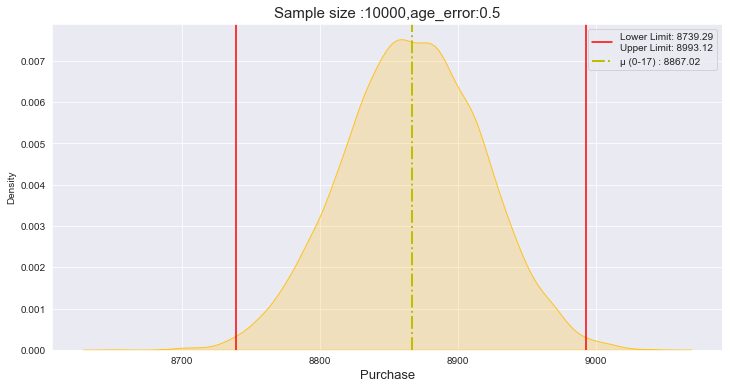

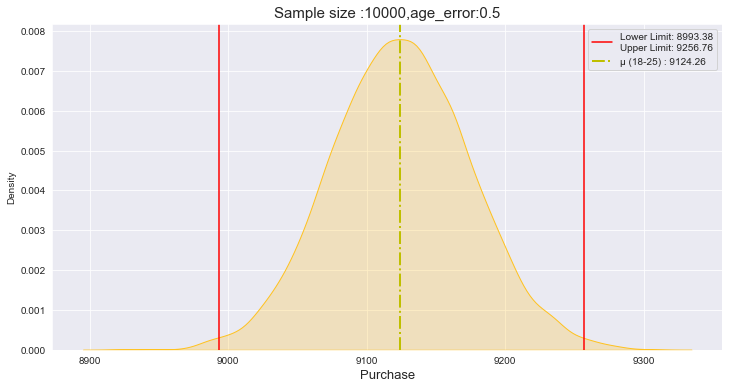

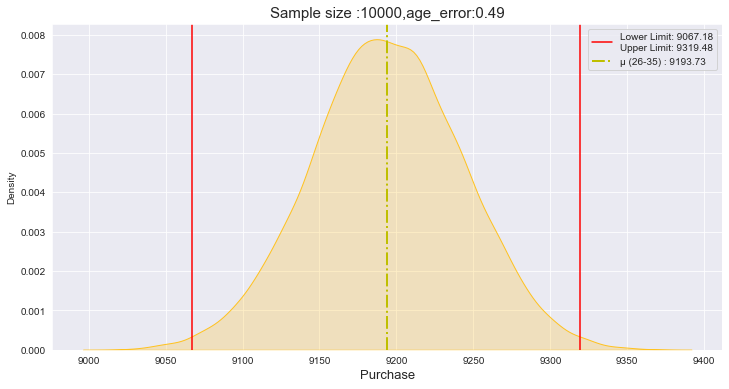

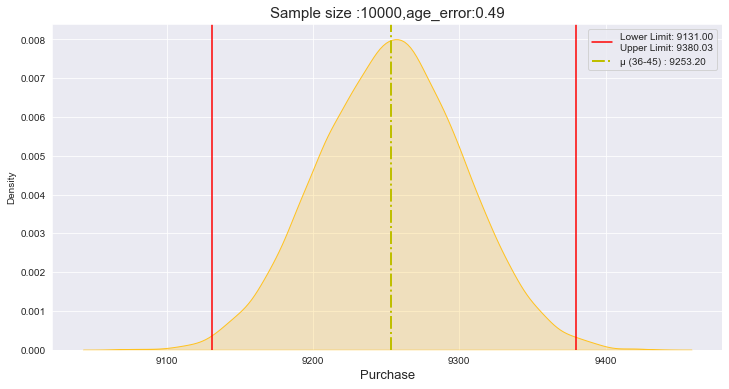

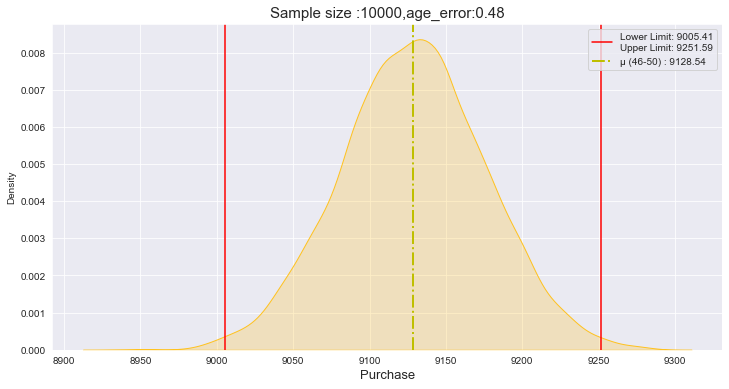

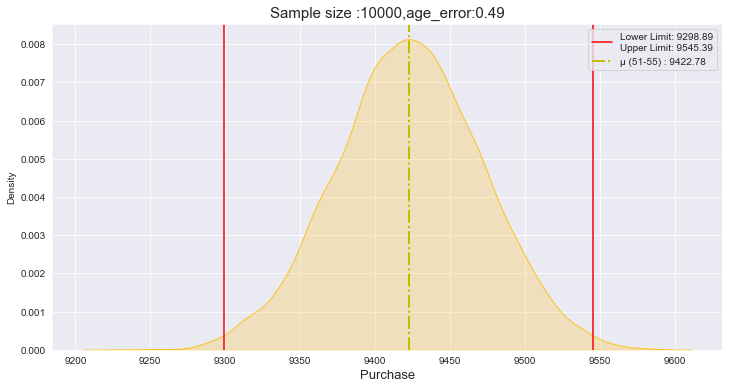

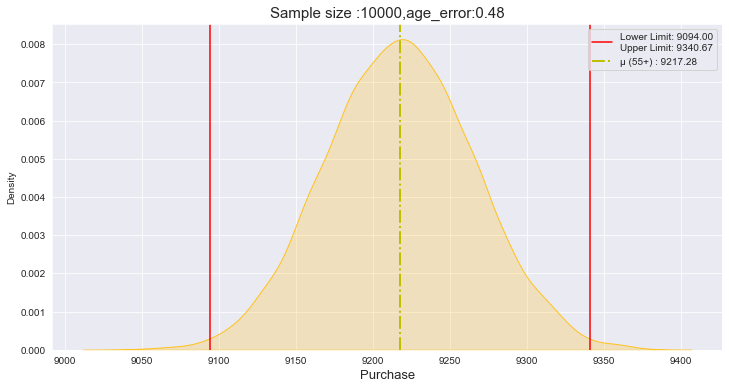

In [284]:
age_list =['0-17', '18-25', '26-35', '36-45','46-50', '51-55', '55+'] 
clt_age = pd.DataFrame({'Age':[],
                        'Sample_size':[],
                       'Lower_limit':[],
                       'Upper_limit':[],
                       'Range':[],
                       'CI':[]})
smpl_size = 10000
ci = 99
for age in age_list:
    age_avg,ll_age,ul_age = confidence_age(
        df.loc[df['Age']==age,'Purchase'],smpl_size,ci,age)
    new_row = {'Age':age,
              'Sample_size':smpl_size,
              'Lower_limit':ll_age,
              'Upper_limit':ul_age,
              'Range':ul_age-ll_age,
              'CI':ci}
    clt_age = clt_age.append(new_row,ignore_index = True)

In [285]:
clt_age

,Age,Sample_size,Lower_limit,Upper_limit,Range,CI
0,0-17,10000.0,8739.294552,8993.117443,253.822891,99.0
1,18-25,10000.0,8993.381699,9256.760967,263.379268,99.0
2,26-35,10000.0,9067.184340,9319.476310,252.291970,99.0
3,36-45,10000.0,9131.004445,9380.025250,249.020805,99.0
4,46-50,10000.0,9005.406158,9251.588584,246.182426,99.0
5,51-55,10000.0,9298.894576,9545.392058,246.497483,99.0
6,55+,10000.0,9093.996481,9340.669502,246.673021,99.0


## Observations
- Spending by age group 0-17 is low compared to other age groups.
- Spending by age group 51-55 is the most between 9294. - 9551.470642.

## Final Insights
- Majority of the customers come from city B but customers from City C spend more on an average.
- Males purchase more than females. 75% of men and only 25% of women purchase products.
- Most of the customers that visit the store have lived in the city for 1 year.
- Purchases made by male customers is always greater than female customers in all age groups.
- 59% of the customers are single.
- Spending by age group 0-17 is low compared to other age groups.
- In category C city most of the customers are males.
- Product Category 10 is more likely to be purchased since it has highest average and median.
- Age group 51-55 are more likely to buy since they have the highest purchase amount average and median.

## Recommendations
- Since females spend less than males on average, adding additional offers for women products can increase their spending on black friday.
- Since spending by age group 0-17 is lowest, adding games and offers would attract younger age groups.
- Management should focus more on customers from city B because they are the highest visitors, but city C have the highest average purchase.
- Managemant should focus on customers who have lived in the current city for 1 year because they are the highest visitors, but not the highest purchases on average.